# IKpy Quickstart #

# Requirements

First, you need to install IKPy (see [installations instructions](https://github.com/Phylliade/ikpy)).
You also need a URDF file.  
By default, we use the files provided in the [resources](https://github.com/Phylliade/ikpy/tree/master/resources) folder of the IKPy repo.

Import the IKPy module : 

In [1]:
import ikpy.chain
import numpy as np
import ikpy.utils.plot as plot_utils

Matplotlib is building the font cache; this may take a moment.


The basic element of IKPy is the kinematic `Chain`.
To create a chain from an URDF file : 

In [34]:
my_chain = ikpy.chain.Chain.from_urdf_file("model.urdf")

/opt/miniconda3/envs/hexapy/lib/python3.9/site-packages/ikpy/chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))
/opt/miniconda3/envs/hexapy/lib/python3.9/site-packages/ikpy/chain.py:60: UserWarning: Link base_joint (index: 1) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))
/opt/miniconda3/envs/he

Note : as mentioned before, here we use a file in the resource folder.

# Inverse kinematics

In Inverse Kinematics, you want your kinematic chain to reach a 3D position in space.

To have a more general representation of position, IKPy works with homogeneous coordinates. It is a 4x4 matrix storing both position and orientation.
Prepare your desired position as a 4x4 matrix. Here we only consider position, not orientation of the chain.

In [35]:
target_position = [ 0.1, -0.1, 0.2]

In [36]:
print("The angles of each joints are : ", my_chain.inverse_kinematics(target_position))

The angles of each joints are :  [ 0.00000000e+00 -2.89777883e+01 -5.74688881e+02  2.77749107e-01
 -1.43051018e+00 -4.23261687e-01  0.00000000e+00]


You can check that the Inverse Kinematics is correct by comparing with the original position vector : 

In [37]:
real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_position))
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], target_position))

Computed position vector : [ 0.1 -0.1  0.2], original position vector : [0.1, -0.1, 0.2]


# Plotting
And finally plot the result : 

(If the code below doesn't work, comment the `%maplotlib widget` line, and uncomment the `%matplotlib inline` line)

(-0.1, 0.1)

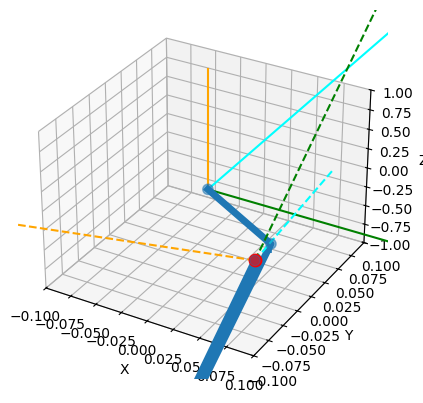

In [38]:
# Optional: support for 3D plotting in the NB
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_position), ax, target=target_position)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

You're done! Go to the [tutorials](https://github.com/Phylliade/ikpy/blob/master/tutorials/ikpy/getting_started.md) to understand the general concepts of the library.